# PCA
1. 통계적으로 상관관계가 없도록 회전하여 성분을 만든다.
2. 주성분 1을 찾는다. 분산이 가장 크고, 데이터를 가장 잘 표현하는 성분
3. 주성분 2를 찾는다. 
4. 상관행렬(상관계수를 표현하는 행렬)에서 대각선을 제외한 모든 값이 0이 된다.



In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 31.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=84d0657fa225b7f8c544395dd2ea6b6d94a5a2a433b158fd6072af19d9d5b7f6
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import mglearn

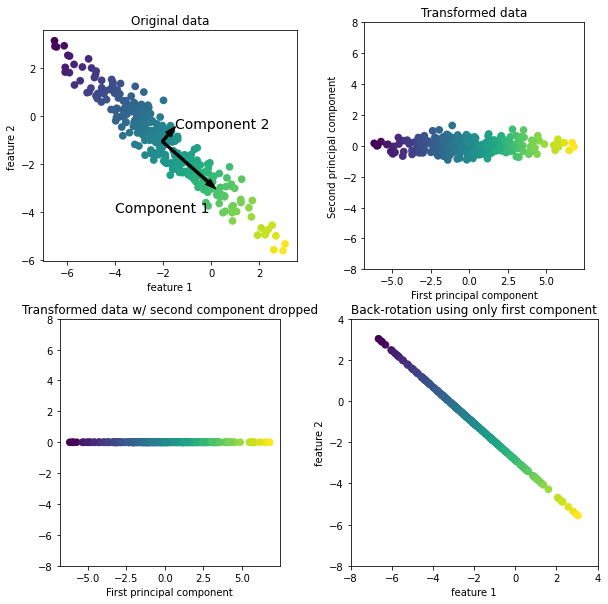

In [3]:
mglearn.plots.plot_pca_illustration()

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,564 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import mglearn

In [2]:
cancer = load_breast_cancer()


In [3]:
# 악성 종양(malignant) : 1
# 양성 종양(benign) : 0
cancer.target_names, cancer.target[0:15]


(array(['malignant', 'benign'], dtype='<U9'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [4]:
malignant = cancer.data[cancer.target == 1]
benign = cancer.data[cancer.target == 0]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

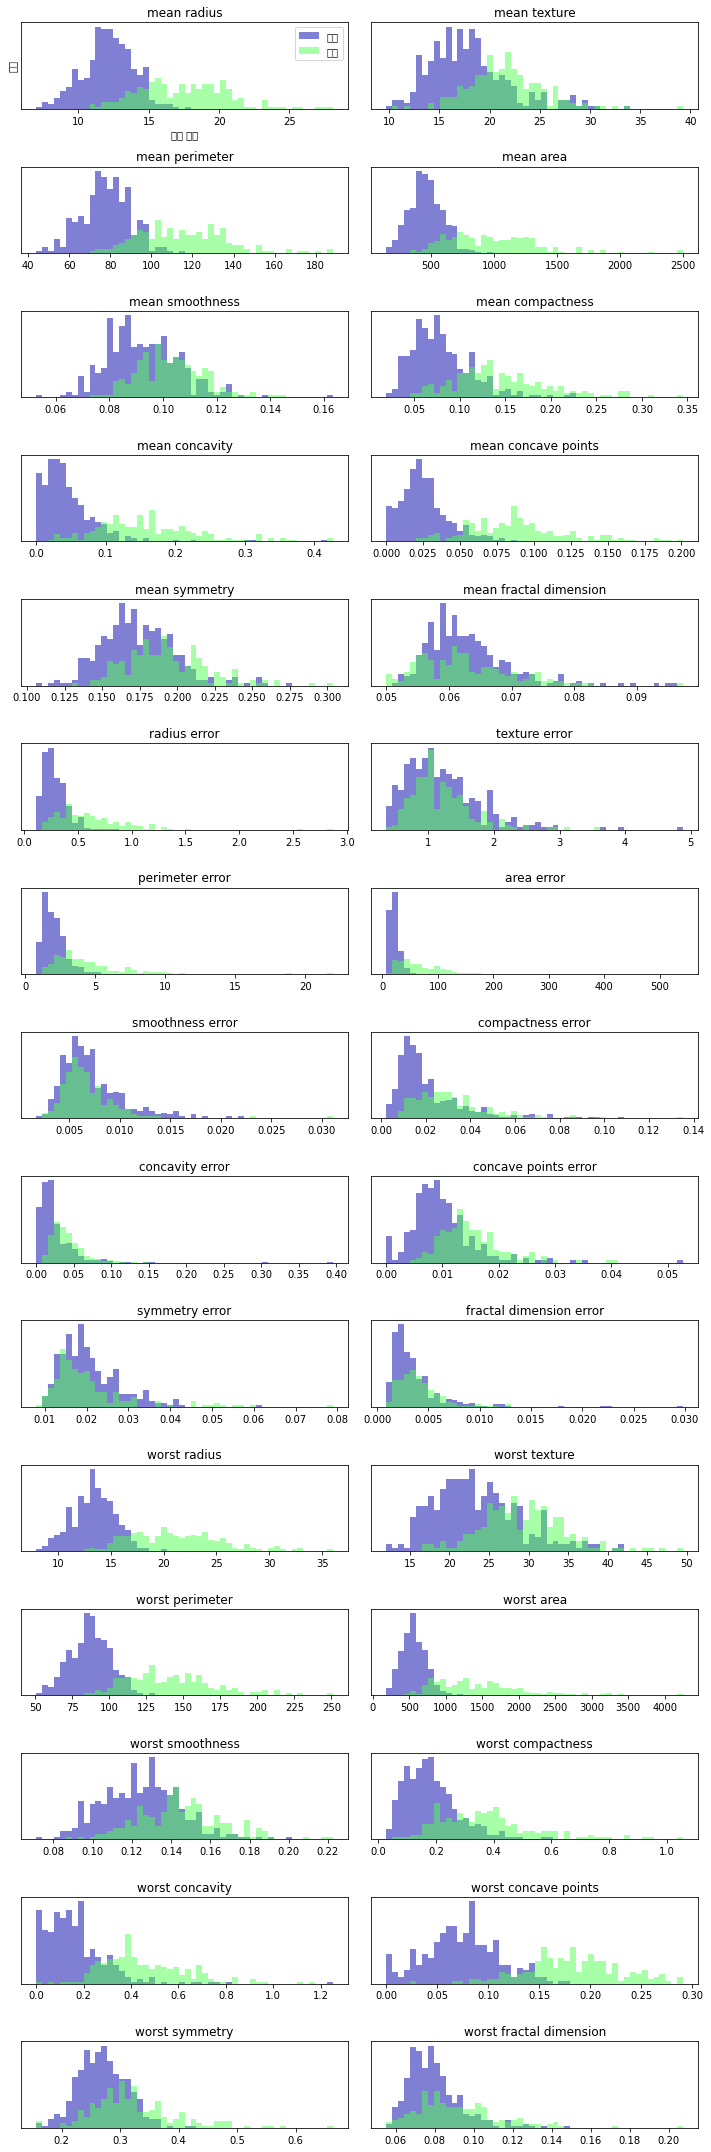

In [5]:
fig, axes = plt.subplots(15, 2, figsize=(10, 30))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.decomposition import PCA

In [8]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [9]:
pca = PCA(n_components = 2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [11]:
# 데이터의 처음 두 개 주성분만 유지
pca = PCA(n_components=2)

# 유방암 데이터로 PCA 모델을 생성
pca.fit(X_scaled)

# 주어진 PCA 이용하여 두 개의 주성분을 가져온다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

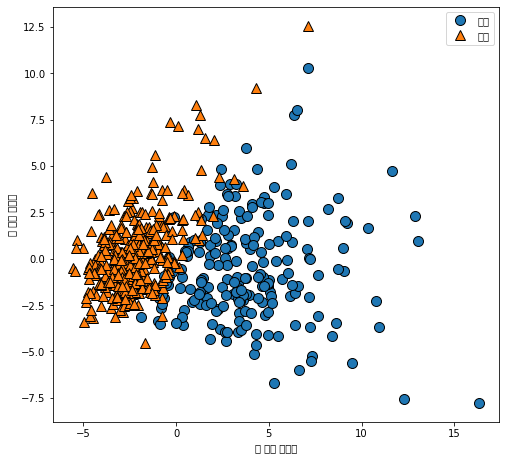

In [12]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 표시
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [13]:
print("PCA 주성분", pca.components_.shape)

PCA 주성분 (2, 30)


In [14]:
print("PCA 주성분", pca.components_)

PCA 주성분 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text

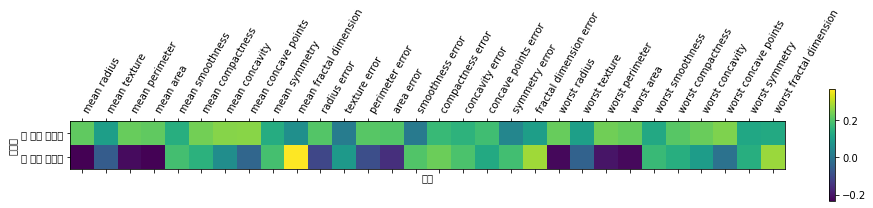

In [15]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

#실습

In [16]:
# 데이터의 처음 두 개 주성분만 유지
pca = PCA(n_components=5)

# 유방암 데이터로 PCA 모델을 생성
pca.fit(X_scaled)

# 주어진 PCA 이용하여 두 개의 주성분을 가져온다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 5)


Text(0, 0.5, '주성분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text

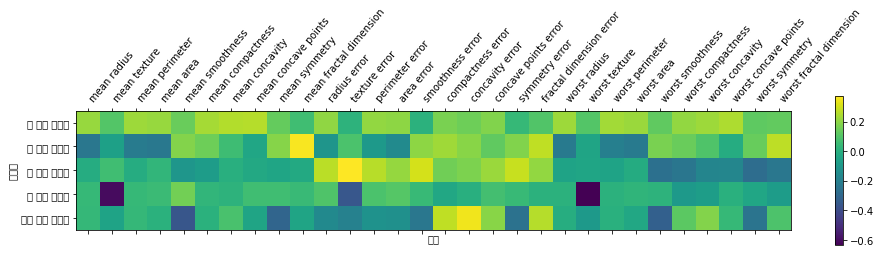

In [18]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4], ["첫 번째 주성분", "두 번째 주성분",
                             "세 번째 주성분", "네 번째 주성분",
                             "다섯 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, 
           rotation=50, 
           ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [19]:
from sklearn.decomposition import PCA

In [20]:
import seaborn as sns

In [21]:
iris = sns.load_dataset("iris")
X_iris = iris.drop("species", axis = 1)
y_iris = iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [22]:
model = PCA()
X_pca_dat = model.fit_transform(X_iris)
print(X_pca_dat.shape, type(X_pca_dat))

(150, 4) <class 'numpy.ndarray'>


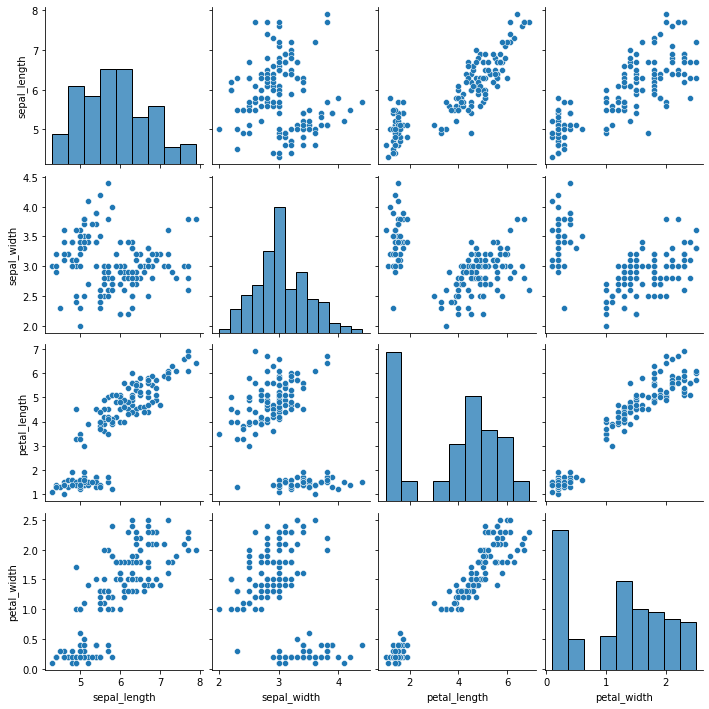

In [23]:
import seaborn as sns
sns.pairplot(iris)

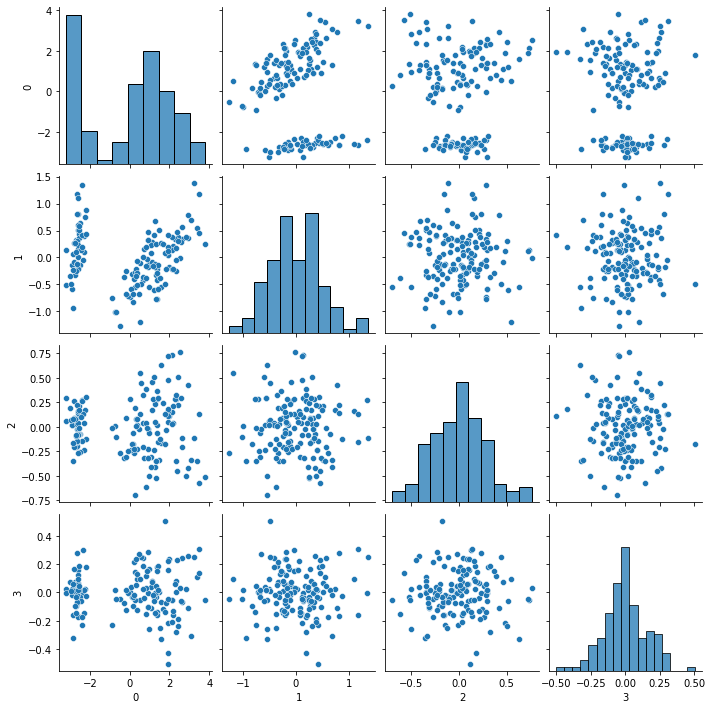

In [24]:
import pandas as pd
df = pd.DataFrame(X_pca_dat[0:,0:])
sns.pairplot(df)

In [25]:
model = PCA(n_components = 2)
X_pca2 = model.fit(X_iris).transform(X_iris)
print(X_pca2.shape, type(X_pca_dat))
print(X_pca2[0:3])

(150, 2) <class 'numpy.ndarray'>
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]]


,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


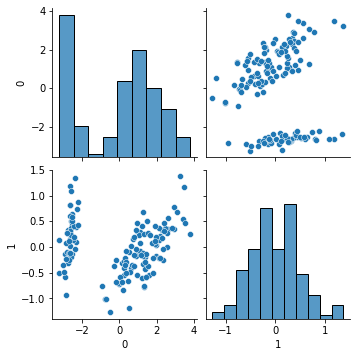

In [26]:
df = pd.DataFrame(X_pca2)
sns.pairplot(df)
df.head(10)

In [27]:
iris['PCA1'] = df.iloc[:,0]  # feature 생성
iris['PCA2'] = df.iloc[:,1]  # feature 생성
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


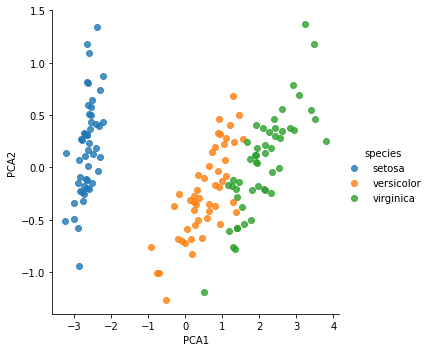

In [28]:
sns.lmplot('PCA1', 'PCA2', hue="species", data=iris, fit_reg=False)

#사람 얼굴 이미지 데이터 셋을 이용한 PCA 예제 실습


In [29]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [30]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

print(people.keys())
print("이미지 행렬: ", people.images.shape)
print("이미지 행렬: ", people.images.shape)
print("살마 : ", people.target_names)

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
이미지 행렬:  (3023, 87, 65)
이미지 행렬:  (3023, 87, 65)
살마 :  ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo 

In [31]:
people.images[0]

array([[ 57.      ,  60.333332,  78.      , ...,  40.666668,  36.666668,
         34.      ],
       [ 52.666668,  60.      ,  92.      , ...,  46.666668,  36.      ,
         30.      ],
       [ 46.      ,  66.      , 113.333336, ...,  51.      ,  43.333332,
         37.666668],
       ...,
       [ 61.      ,  62.666668,  62.333332, ...,  19.      ,  18.333334,
         18.666666],
       [ 62.666668,  64.666664,  67.      , ...,  17.333334,  18.      ,
         22.333334],
       [ 65.333336,  68.      ,  67.      , ...,  17.333334,  16.666666,
         22.666666]], dtype=float32)

In [32]:
np.min(people.images[0]), np.max(people.images[0])


(11.666667, 245.0)

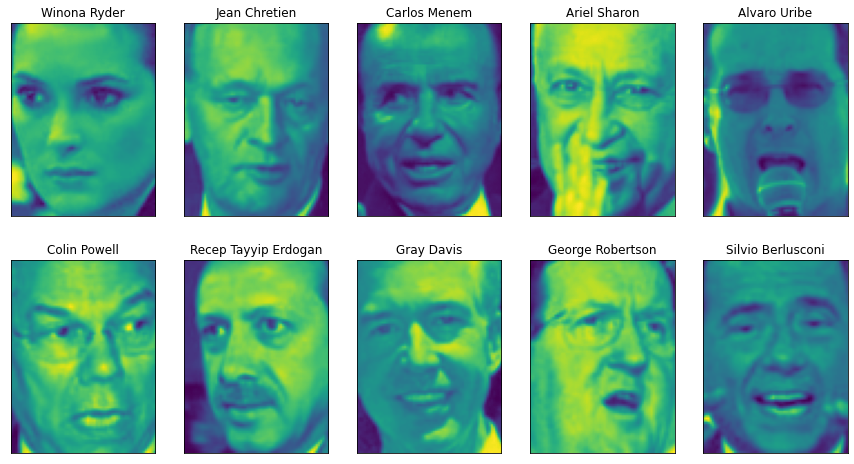

In [33]:
### 얼굴 이미지 10개 표시
fig, axes = plt.subplots(2, 5, figsize = (15, 8),
                         subplot_kw = {'xticks': (), 'yticks':() })

for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [34]:
people.target[0:10]

array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54])

In [35]:
counts = np.bincount(people.target)

In [36]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [37]:
### 타깃(사람)의 이름과 각 사람별 데이터 개수 출력.
for i, (count, name) in enumerate( zip(counts, people.target_names) ):
    print("{0:25} {1:3}".format(name, count), end= '   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [38]:
nums = people.target.shape
mask = np.zeros(nums, dtype = np.bool)
mask.shape

(3023,)

In [39]:
nums = np.unique(people.target)
nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [40]:
for target in nums:
  mask[np.where(people.target == target)[0][:50]] =1

X_people = people.data[mask]
y_people = people.target[mask]

X_people.shape, y_people.shape

((2063, 5655), (2063,))

In [41]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split( X_people, y_people, stratify = y_people, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수:{:2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수:0.232558


In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape", X_train_pca.shape)
print("X_test_pca.shape", X_test_pca.shape)

X_train_pca.shape (1547, 100)
X_test_pca.shape (516, 100)


In [44]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train_pca, y_train)

print("테스트 정확도:{:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 정확도:0.31


변수가 많다고 좋은 것은 아니다
변수가 독립적을 떄 좋은 것이다. 
오히려비슷비슷한 변수가 많으면 모델을 만들때 더 복잡해지고 모델 성능이 떨어진다.
비슷한 100개의 변수보다 독립적인 소수의 변수가 더 좋다.


In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)
print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)
X_train_pca.shape: (1547, 100)


In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("최근접 이웃의 테스트 세트 점수:", knn.score(X_test_pca, y_test))

최근접 이웃의 테스트 세트 점수: 0.312015503875969


pca.components_.shape  (100, 5655)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text

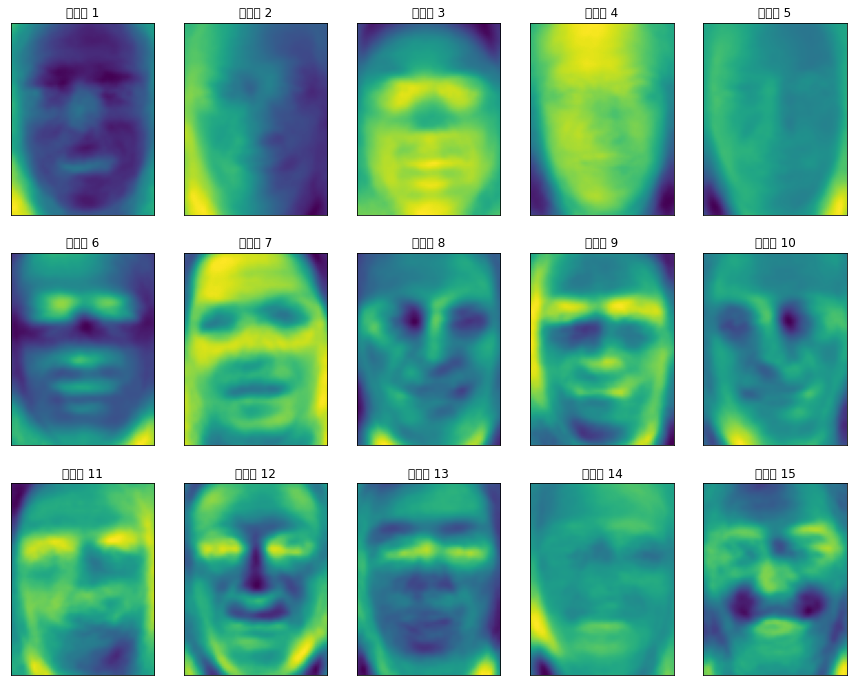

In [48]:
image_shape = people.images[0].shape

print("pca.components_.shape ", pca.components_.shape)

fig, axes = plt.subplots(3, 5, figsize=(15,12),
                        subplot_kw={'xticks':(), 'yticks':() })

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="viridis")
    ax.set_title("주성분 {}".format((i+1)))

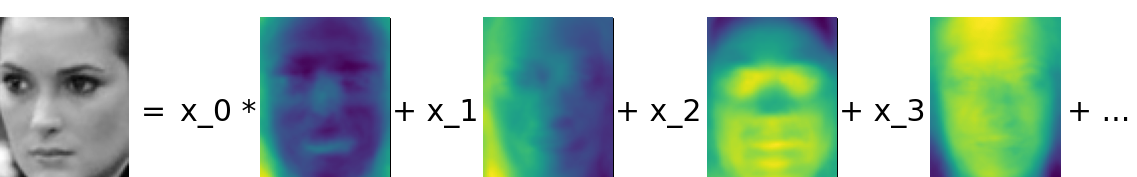

In [49]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

#T-SNE(티스니)

In [50]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.datasets import load_digits
### 마이너스 설정
from matplotlib import rc
matplotlib.rc("axes", unicode_minus=False)

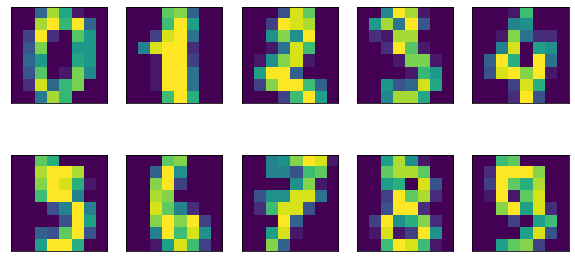

In [51]:
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5),
                        subplot_kw = {'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [52]:
print(digits.data.shape)    # 1797행, 64열(8*8) - 1797개 8x8 픽셀정보
print(digits.data[1:5])
print(digits.DESCR)
print(digits.images[1:5])
print(digits.images.shape)
print(digits.target[1:15])
print(digits.target.shape)
print(digits.target_names)

(1797, 64)
[[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
   9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
 [ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
   1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
   0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1. 

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, '두 번째 주성분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

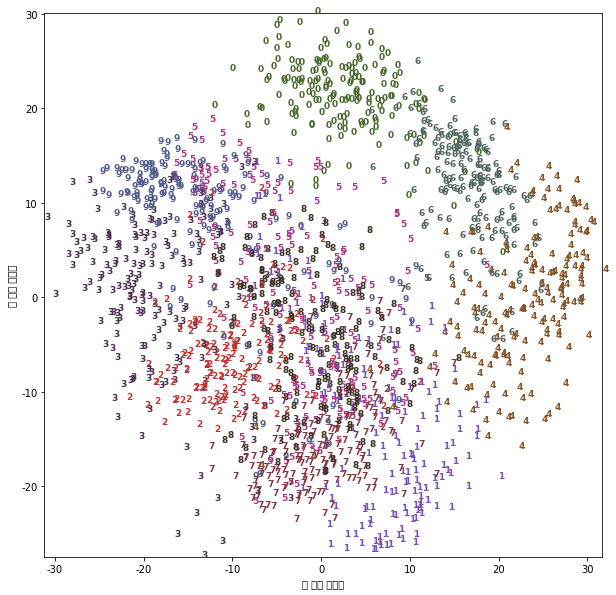

In [54]:
# 처음 두 개의 주성분으로 숫자 데이터를 변환한다.
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))

# 두개의 주성분의 값의 범위를 x축, y축 지정.
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())


for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [55]:
digits.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [56]:
digits.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [57]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메서드가 없다. 
# 새 데이터변환 기능 제공안함.
# 대신 fit_transform 사용.
d_tsne = tsne.fit_transform(digits.data)
print("기존 데이터 형태 :" , digits.data.shape)
print("tsne로 표현한 데이터 형태 :" ,d_tsne.shape)

기존 데이터 형태 : (1797, 64)
tsne로 표현한 데이터 형태 : (1797, 2)


In [58]:
print(d_tsne[:,0].shape)
print(d_tsne[:,0].min(), d_tsne[:,0].max())   # 성분1의 최소 최대값
print(d_tsne[:,1].min(), d_tsne[:,1].max())   # 성분2의 최소 최대값

(1797,)
-66.34908 69.72079
-60.289627 50.1673


Text(0.5, 0, 't-SNE 특성 1')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


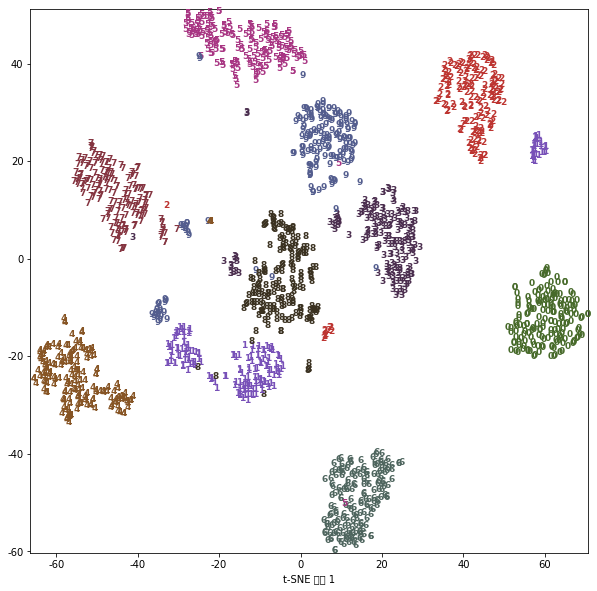

In [59]:
plt.figure(figsize=(10,10)) # 그래프 사이즈 지정.
plt.xlim(d_tsne[:,0].min(), d_tsne[:,0].max() + 1)
plt.ylim(d_tsne[:,1].min(), d_tsne[:,1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(d_tsne[i,0], 
             d_tsne[i,1],
             str(digits.target[i]),
             color =  colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})
plt.xlabel("t-SNE 특성 0")
plt.xlabel("t-SNE 특성 1")